# SVM Prediction for Porosity Prediction

'\nplt.subplot(1,7,7)\nplt.plot(df_target.P_imp, df_target.DEPTH, color=\'b\')\nplt.gca().axes.yaxis.set_ticklabels([])\nplt.ylim(top,bot)\nplt.grid()\nplt.xlabel("P-Imp (m/s g/cc)")\nplt.xlim(df_target.P_imp.min(),df_target.P_imp.max())\n'

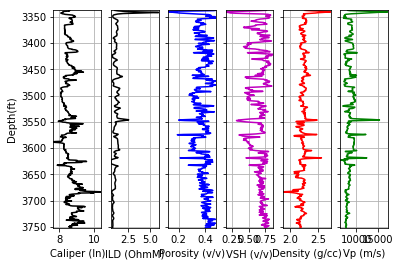

In [23]:
import matplotlib.pyplot as plt
import lasio
import warnings
warnings.filterwarnings('ignore')

las = lasio.read('C:\\Users\\Henky\\JUPYTER\\PUKESMIGAS\\puk1.las')
"""
depth in ft
DT in mus/ft
rhob in g/cc
Vp in m/s
P Impedance in m/s g/cc
"""

df=las.df()
gr_max=df['GR'].max()
gr_min=df['GR'].min()
df['VSH']=(df['GR']-gr_min)/(gr_max-gr_min)
df['Vp']=1/df['DT']*10**(6)
df['P_imp']=df['Vp']*df['RHOB']

#rename column
df=df.rename(columns={'NPHI_LS':'NPHI'})

#drop column which have no record
df_drop=df.dropna(subset=['P_imp'],axis=0)

#select only at the target area
df_target=df_drop.loc[3337.79:3751.5].reset_index()

top=df_target['DEPTH'].max()
bot=df_target['DEPTH'].min()

plt.subplot(1,6,1)
plt.plot(df_target.CALI, df_target.DEPTH, color='k')
plt.ylim(top,bot)
plt.grid()
plt.xlabel("Caliper (In)")
plt.xlim(df_target.CALI.min(),df_target.CALI.max())
plt.ylabel("Depth(ft)")

plt.subplot(1,6,2)
plt.plot(df_target.ILD, df_target.DEPTH, color='k')
plt.gca().axes.yaxis.set_ticklabels([])
plt.ylim(top,bot)
plt.grid()
plt.xlabel("ILD (OhmM)")
plt.xlim(df_target.ILD.min(),df_target.ILD.max())

plt.subplot(1,6,3)
plt.plot(df_target.NPHI, df_target.DEPTH, color='b')
plt.gca().axes.yaxis.set_ticklabels([])
plt.ylim(top,bot)
plt.grid()
plt.xlabel("Porosity (v/v)")
plt.xlim(df_target.NPHI.min(),df_target.NPHI.max())

plt.subplot(1,6,4)
plt.plot(df_target.VSH, df_target.DEPTH, color='m')
plt.gca().axes.yaxis.set_ticklabels([])
plt.ylim(top,bot)
plt.grid()
plt.xlabel("VSH (v/v)")
plt.xlim(df_target.VSH.min(),df_target.VSH.max())

plt.subplot(1,6,5)
plt.plot(df_target.RHOB, df_target.DEPTH, color='r')
plt.gca().axes.yaxis.set_ticklabels([])
plt.ylim(top,bot)
plt.grid()
plt.xlabel("Density (g/cc)")
plt.xlim(df_target.RHOB.min(),df_target.RHOB.max())

plt.subplot(1,6,6)
plt.plot(df_target.Vp, df_target.DEPTH, color='g')
plt.gca().axes.yaxis.set_ticklabels([])
plt.ylim(top,bot)
plt.grid()
plt.xlabel("Vp (m/s)")
plt.xlim(df_target.Vp.min(),df_target.Vp.max())

"""
plt.subplot(1,7,7)
plt.plot(df_target.P_imp, df_target.DEPTH, color='b')
plt.gca().axes.yaxis.set_ticklabels([])
plt.ylim(top,bot)
plt.grid()
plt.xlabel("P-Imp (m/s g/cc)")
plt.xlim(df_target.P_imp.min(),df_target.P_imp.max())
"""


### Random state dilakukan untuk menguji konsistensi data yang digunakan untuk  tes dan train test_size menggunakan 20% dari data


Mean square error adalah eror kuadrat dari test dan test pred 
r2 score adalah korelasi (0.5-0.9 termasuk model yang bagus)
untuk nyobain r2 score gonta ganti "C" nya
we have to optimize the "C" value
accuracy score: percentage of observation that our model is or model is predicting correctly
confusion matrix: sum of row represent actual value, sum of colmn represent predicted value



TEST R2 Score PUK1 = 0.5711025033440145


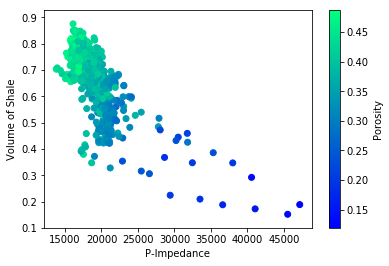

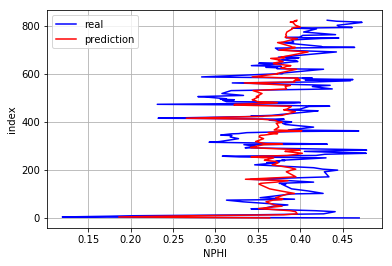

In [24]:


# split X and y
X=df_target[['RHOB','VSH','Vp']]
y=df_target[['NPHI']]

#test and train split
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=0)



#plot data P-Impedance vs Vsh dengan color key porositas
plt.figure()
plt.scatter(df_target['P_imp'],df_target['VSH'],c=df_target['NPHI'],cmap='winter')
plt.colorbar().set_label('Porosity')
plt.xlabel('P-Impedance')
plt.ylabel('Volume of Shale')


#standardizing data
from sklearn.preprocessing import StandardScaler
"""
membuat standarisasi data, dengan mean=0 dan varians = 1
"""
sc=StandardScaler().fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

#SVM regression model
from sklearn.svm import SVR
svr=SVR(kernel='linear',C=1)
svr.fit(X_train_std,y_train) 

#predict value using trained model
y_test_pred=svr.predict(X_test_std)
y_train_pred=svr.predict(X_train_std)  

#model performance
from sklearn.metrics import mean_squared_error,r2_score

error=mean_squared_error(y_test,y_test_pred) #kayaknya ini ga usah
train_r2_score=r2_score(y_train, y_train_pred)
test_r2_score=r2_score(y_test, y_test_pred)
print("TEST R2 Score PUK1 =", test_r2_score)


#plot in depth y_train overlay y_train_pred
y_test['NPHI_pred']=y_test_pred
y_test=y_test.sort_index()
plt.figure()
plt.plot(y_test.NPHI, y_test.index, color='b',label='real')
plt.plot(y_test.NPHI_pred, y_test.index, color='r',label='prediction')
plt.grid()
plt.xlabel("NPHI")
plt.ylabel("index")
plt.legend()


## SCORE FOR PUM1

TEST R2 Score PUM1 = 0.5420766435010944


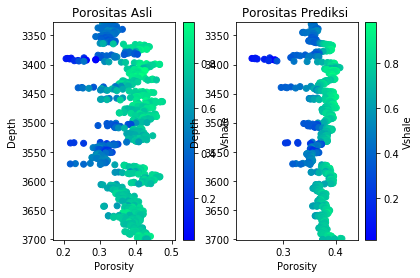

In [25]:


las2 = lasio.read('C:\\Users\\Henky\\JUPYTER\\PUKESMIGAS\\pum1.las')
"""
depth in ft
DT in mus/ft
rhob in g/cc
Vp in m/s
P Impedance in m/s g/cc
"""

df2=las2.df()
gr_max=df2['GR'].max()
gr_min=df2['GR'].min()
df2['VSH']=(df2['GR']-gr_min)/(gr_max-gr_min)
df2['Vp']=1/df2['DT']*10**(6)
df2['P_imp']=df2['Vp']*df2['RHOB']

#rename column
df2=df2.rename(columns={'NPHI_LS':'NPHI'})

#drop column which have no record
df2_drop=df2.dropna(subset=['P_imp'],axis=0)

#select only at the target area
df2_target=df2_drop.loc[3327.15:3701.74].reset_index()

X2=df2_target[['RHOB','VSH','Vp']]
y2=df2_target[['NPHI']]


sc=StandardScaler().fit(X2)
X2_std=sc.transform(X2)
y2_pred=svr.predict(X2_std)

test2_r2_score=r2_score(y2, y2_pred)
print("TEST R2 Score PUM1 =",test2_r2_score)

#plotting check POR VS DEPTH
y2['NPHI_pred']=y2_pred
y2=y2.sort_index()
plt.figure()
plt.subplot(1,2,1)
plt.title('Porositas Asli ')
plt.scatter(y2['NPHI'],df2_target['DEPTH'],c=df2_target['VSH'],cmap='winter')
plt.ylim(df2_target['DEPTH'].max(),df2_target['DEPTH'].min())
plt.colorbar().set_label('Vshale')
plt.xlabel('Porosity')
plt.ylabel('Depth')

plt.subplot(1,2,2)
plt.title('Porositas Prediksi ')
plt.scatter(y2['NPHI_pred'],df2_target['DEPTH'],c=df2_target['VSH'],cmap='winter')
plt.ylim(df2_target['DEPTH'].max(),df2_target['DEPTH'].min())
plt.colorbar().set_label('Vshale')
plt.xlabel('Porosity')
plt.ylabel('Depth')
plt.show()

## SCORE for PUX2

RMS error for well #3 is: 0.0007763042670026633
r2 score for well #3 is: 0.5656343946731651


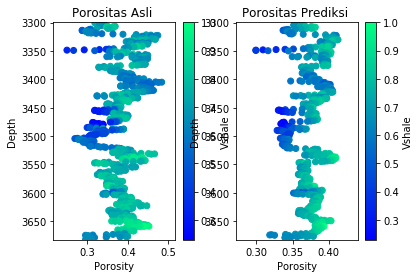

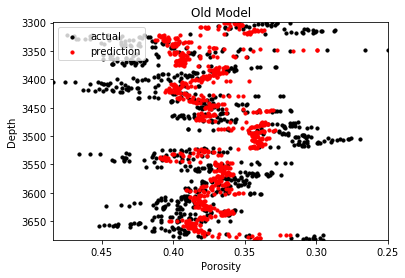

In [26]:
las3 = lasio.read('C:\\Users\\Henky\\JUPYTER\\PUKESMIGAS\\pux2.las')
"""
depth in ft
DT in mus/ft
rhob in g/cc
Vp in m/s
P Impedance in m/s g/cc
"""

df3=las3.df()
gr_max=df3['GR'].max()
gr_min=df3['GR'].min()
df3['VSH']=(df3['GR']-gr_min)/(gr_max-gr_min)
df3['Vp']=1/df3['DT']*10**(6)
df3['P_imp']=df3['Vp']*df3['RHOB']

#rename column
df3=df3.rename(columns={'NPHI_LS':'NPHI'})

#drop column which have no record
df3_drop=df3.dropna(subset=['P_imp'],axis=0)

#select only at the target area
#df3_target=df3_drop.loc[3316.28:3651.67].reset_index() #uxa-1
df3_target=df3_drop.loc[3299.43:3683.01].reset_index() #ux-2

X3=df3_target[['RHOB','VSH','Vp']]
y3=df3_target[['NPHI']]


sc=StandardScaler().fit(X3)
X3_std=sc.transform(X3)
y3_pred=svr.predict(X3_std)

rmse3=mean_squared_error(y3,y3_pred)
test3_r2_score=r2_score(y3, y3_pred)
print("RMS error for well #3 is: " + str(rmse3))
print("r2 score for well #3 is: " + str(test3_r2_score))

#plotting check POR VS DEPTH
y3['NPHI_pred']=y3_pred
y3=y3.sort_index()
plt.figure()

plt.subplot(1,2,1)
plt.title('Porositas Asli ')
plt.scatter(y3['NPHI'],df3_target['DEPTH'],c=df3_target['VSH'],cmap='winter')
plt.ylim(df3_target['DEPTH'].max(),df3_target['DEPTH'].min())
plt.colorbar().set_label('Vshale')
plt.xlabel('Porosity')
plt.ylabel('Depth')

plt.subplot(1,2,2)
plt.title('Porositas Prediksi ')
plt.scatter(y3['NPHI_pred'],df3_target['DEPTH'],c=df3_target['VSH'],cmap='winter')
plt.ylim(df3_target['DEPTH'].max(),df3_target['DEPTH'].min())
plt.colorbar().set_label('Vshale')
plt.xlabel('Porosity')
plt.ylabel('Depth')

#plotting check overlay
plt.figure()
plt.scatter(y3['NPHI'],df3_target['DEPTH'],c='k',label='actual',s=10)
plt.scatter(y3['NPHI_pred'],df3_target['DEPTH'],c='r',label='prediction',s=10)
plt.legend(loc='upper left');
plt.ylim(df3_target['DEPTH'].max(),df3_target['DEPTH'].min())
plt.xlim(y3['NPHI'].max(),y3['NPHI'].min())
plt.xlabel('Porosity')
plt.ylabel('Depth')
plt.title('Old Model')
plt.show()